In [1]:
import numpy as np
x = np.linspace(-90, 90, 6)
y = np.linspace(90, -90, 6)
print(x)
print(y)
X, Y = np.meshgrid(x, y)
print("X:")
print(X)
print("Y:")
print(Y)

[-90. -54. -18.  18.  54.  90.]
[ 90.  54.  18. -18. -54. -90.]
X:
[[-90. -54. -18.  18.  54.  90.]
 [-90. -54. -18.  18.  54.  90.]
 [-90. -54. -18.  18.  54.  90.]
 [-90. -54. -18.  18.  54.  90.]
 [-90. -54. -18.  18.  54.  90.]
 [-90. -54. -18.  18.  54.  90.]]
Y:
[[ 90.  90.  90.  90.  90.  90.]
 [ 54.  54.  54.  54.  54.  54.]
 [ 18.  18.  18.  18.  18.  18.]
 [-18. -18. -18. -18. -18. -18.]
 [-54. -54. -54. -54. -54. -54.]
 [-90. -90. -90. -90. -90. -90.]]


[[13776.    8586.24  5573.76  4738.56  6080.64  9600.  ]
 [10256.64  5066.88  2054.4   1219.2   2561.28  6080.64]
 [ 8914.56  3724.8    712.32  -122.88  1219.2   4738.56]
 [ 9749.76  4560.    1547.52   712.32  2054.4   5573.76]
 [12762.24  7572.48  4560.    3724.8   5066.88  8586.24]
 [17952.   12762.24  9749.76  8914.56 10256.64 13776.  ]]


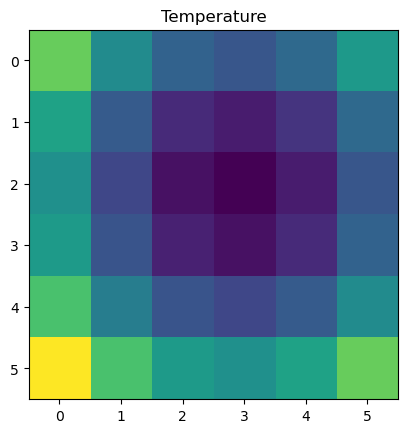

In [2]:
import matplotlib.pyplot as plt

Z1 =  np.abs(((X - 10) ** 2 + (Y - 10) ** 2) / 1 ** 2)
Z2 =  np.abs(((X + 10) ** 2 + (Y + 10) ** 2) / 2.5 ** 2)
Z =  (Z1 - Z2)
print(Z)
plt.imshow(Z)
plt.title("Temperature")
plt.show()

In [3]:
from rasterio.transform import Affine
import rasterio as rio

res = (x[-1] - x[0]) / 240.0
transform = Affine.translation(x[0] - res / 2, y[0] - res / 2) * Affine.scale(res, res)

# open in 'write' mode, unpack profile info to dst
with rio.open(
    "../temp/new_raster.tif",
    "w",
    driver="GTiff",         # output file type
    height=Z.shape[0],      # shape of array
    width=Z.shape[1],
    count=1,                # number of bands
    dtype=Z.dtype,          # output datatype
    crs="+proj=latlong",    # CRS
    transform=transform,    # location and resolution of upper left cell
) as dst:
    # check for number of bands
    if dst.count == 1:
        # write single band
        dst.write(Z, 1)
    else:
        # write each band individually
        for band in range(len(Z)):
            # write data, band # (starting from 1)
            dst.write(Z[band], band + 1)

RasterioIOError: Attempt to create new tiff file '../temp/new_raster.tif' failed: No such file or directory